In [1]:
import SERfuncs

In [2]:
from __future__ import division
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import graphlab

A newer version of GraphLab Create (v2.0.1) is available! Your current version is v1.10.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [3]:
HealthyData = graphlab.SFrame.read_csv('../Datasets/Cbrace/HealthyData.csv')
CBRData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientCBRData.csv')
SCOData = graphlab.SFrame.read_csv('../Datasets/Cbrace/PatientSCOData.csv')

[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: /tmp/graphlab_server_1468367073.log


This non-commercial license of GraphLab Create is assigned to llonini@ricres.org and will expire on November 11, 2016. For commercial licensing options, visit https://turi.com/buy/.


Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 100 lines in 0.318636 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/HealthyData.csv

Parsing completed. Parsed 8375 lines in 0.489197 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 100 lines in 0.661369 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientCBRData.csv

Parsing completed. Parsed 22354 lines in 1.22558 secs.

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 100 lines in 0.708479 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,int,int,int,int,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to 

Finished parsing file /Users/luca/Projects/Datasets/Cbrace/PatientSCOData.csv

Parsing completed. Parsed 18762 lines in 1.04149 secs.

In [4]:
CBRData.head(5)

Columns:
	SubjID	int
	Session	int
	Features_  1	float
	Features_  2	float
	Features_  3	float
	Features_  4	int
	Features_  5	int
	Features_  6	int
	Features_  7	int
	Features_  8	float
	Features_  9	float
	Features_ 10	float
	Features_ 11	float
	Features_ 12	float
	Features_ 13	float
	Features_ 14	float
	Features_ 15	float
	Features_ 16	float
	Features_ 17	float
	Features_ 18	int
	Features_ 19	int
	Features_ 20	int
	Features_ 21	int
	Features_ 22	float
	Features_ 23	float
	Features_ 24	float
	Features_ 25	float
	Features_ 26	float
	Features_ 27	float
	Features_ 28	float
	Features_ 29	float
	Features_ 30	float
	Features_ 31	float
	Features_ 32	int
	Features_ 33	int
	Features_ 34	int
	Features_ 35	int
	Features_ 36	float
	Features_ 37	float
	Features_ 38	float
	Features_ 39	float
	Features_ 40	float
	Features_ 41	float
	Features_ 42	float
	Features_ 43	float
	Features_ 44	float
	Features_ 45	float
	Features_ 46	float
	Features_ 47	float
	Features_ 48	float
	Features_ 49	float
	Features_ 50	float
	Features_ 51	float
	Features_ 52	float
	Features_ 53	float
	Features_ 54	float
	Features_ 55	float
	Features_ 56	float
	Features_ 57	float
	Features_ 58	float
	Features_ 59	float
	Features_ 60	float
	Features_ 61	float
	Features_ 62	float
	Features_ 63	float
	Features_ 64	float
	Features_ 65	float
	Features_ 66	float
	Features_ 67	float
	Features_ 68	float
	Features_ 69	float
	Features_ 70	float
	Features_ 71	float
	Features_ 72	float
	Features_ 73	float
	Features_ 74	float
	Features_ 75	float
	Features_ 76	float
	Features_ 77	float
	Features_ 78	float
	Features_ 79	float
	Features_ 80	float
	Features_ 81	float
	Features_ 82	float
	Features_ 83	float
	Features_ 84	float
	Features_ 85	float
	Features_ 86	float
	Features_ 87	float
	Features_ 88	float
	Features_ 89	float
	Features_ 90	float
	Features_ 91	float
	Features_ 92	float
	Features_ 93	float
	Features_ 94	float
	Features_ 95	float
	Features_ 96	float
	Features_ 97	float
	Features_ 98	float
	Features_ 99	float
	Features_100	float
	Features_101	float
	Features_102	float
	Features_103	float
	Features_104	float
	Features_105	float
	Features_106	float
	Features_107	float
	Features_108	float
	Features_109	float
	Features_110	float
	Features_111	float
	Features_112	float
	Features_113	float
	Features_114	float
	Features_115	float
	Features_116	float
	Features_117	float
	Features_118	float
	Features_119	float
	Features_120	float
	Features_121	float
	Features_122	float
	Features_123	float
	Features_124	float
	Features_125	float
	Features_126	float
	Features_127	float
	Features_128	float
	Features_129	float
	Features_130	float
	Features_131	float
	Label	int

Rows: 5

Data:
+--------+---------+-----------------+--------------+--------------+--------------+
| SubjID | Session |   Features_  1  | Features_  2 | Features_  3 | Features_  4 |
+--------+---------+-----------------+--------------+--------------+--------------+
|   1    |    1    |  0.051382320442 |    0.6076    |    0.196     |      0       |
|   1    |    1    | 0.0253933701657 |    0.6076    |    0.1176    |      0       |
|   1    |    1    | 0.0248519337017 |     0.49     |    0.1176    |      0       |
|   1    |    1    | 0.0465635359116 |    0.3136    |    0.0784    |      0       |
|   1    |    1    | 0.0781834254144 |    0.2352    |    0.0784    |      56      |
+--------+---------+-----------------+--------------+--------------+--------------+
+--------------+--------------+--------------+-----------------+-----------------+
| Features_  5 | Features_  6 | Features_  7 |   Features_  8  |   Features_  9  |
+--------------+--------------+--------------+-----------------+-----------------+
|     181      |      0       |      0       |  0.112454267826 | -0.294668590342 |
|     178      |      3       |      0       | 0.0983200079119 | 0.0523105353163 |
|     181      |      0       |      0       | 0.0841222692085 | -0.592549758023 |
|     181      |      0       |      0       | 0.0654386480834 |  -1.01056633159 |
|     

In [5]:
#SUBJECTS IN THE DATABASE
HealthyCodes = HealthyData['SubjID'].unique()
print HealthyCodes
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
print PatientCodes

[60, 53, 54, 61, 51, 56, 58, 55, 59, 52, 57]
[1, 2, 5, 6, 8, 11, 12, 13, 14, 15, 16, 19]


In [6]:
#LOSO cross validation on healthy
# NEED TO UPDATE TO BALANCED ACCURACY

col_names = HealthyData.column_names()
label_cols = col_names[-1:] #the : is used to return a list with one element 
feature_cols = col_names[2:-1]

CVacc = np.zeros(len(HealthyCodes)) 
k = 0
for s in HealthyCodes:
    print 'Subject = %s'%s
    #1 subject is test, the rest is used for training
    test = HealthyData[HealthyData['SubjID'] == s]
    train = HealthyData[HealthyData['SubjID'] != s]
    Xtrain = train.select_columns(feature_cols).to_numpy()
    ytrain = train.select_columns(label_cols).to_numpy()
    ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    #train a RF 
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtrain,ytrain)
    ypred = RF.predict(Xtest)
    acc = sum(ypred == ytest)
    CVacc[k] = acc/len(ytest)
    print CVacc[k]
    k = k+1
    
print 'mean CVacc = %s'%CVacc.mean()
    

Subject = 60
Train samples = 7695, Test samples = 680
0.720588235294
Subject = 53
Train samples = 7608, Test samples = 767
0.779661016949
Subject = 54
Train samples = 7692, Test samples = 683
0.670571010249
Subject = 61
Train samples = 7710, Test samples = 665
0.415037593985
Subject = 51
Train samples = 7371, Test samples = 1004
0.739043824701
Subject = 56
Train samples = 7591, Test samples = 784
0.936224489796
Subject = 58
Train samples = 7617, Test samples = 758
0.46437994723
Subject = 55
Train samples = 7668, Test samples = 707
0.913719943423
Subject = 59
Train samples = 7649, Test samples = 726
0.710743801653
Subject = 52
Train samples = 7666, Test samples = 709
0.77856135402
Subject = 57
Train samples = 7483, Test samples = 892
0.868834080717
mean CVacc = 0.727033208911


In [7]:
#display the Confusion Matrix for one subject
#labels=["sitting", "stairs dw", "stairs up", "standing", "walking"])
cmat = confusion_matrix(ytest, ypred)
#print cmat
totals = cmat.sum(axis=1)
cmat = cmat/totals
print cmat

[[ 0.9887218   0.          0.01219512  0.00673401  0.        ]
 [ 0.          1.          0.          0.          0.        ]
 [ 0.          0.53030303  0.37804878  0.          0.08839779]
 [ 0.16541353  0.          0.01219512  0.81818182  0.04972376]
 [ 0.          0.09090909  0.          0.01010101  0.95027624]]


## Train on Healthy and test on CBR patients


In [8]:
#NEED TO UPDATE TO BACC
Xtrain = HealthyData.select_columns(feature_cols).to_numpy()
ytrain = HealthyData.select_columns(label_cols).to_numpy()
ytrain = ytrain.reshape(-1) #to squeeze last dimension and obtain a 1D array

RF = RandomForestClassifier(n_estimators=50)
RF = RF.fit(Xtrain,ytrain)

#test on each patient (CBR)
PatientCodes = CBRData['SubjID'].unique()
PatientCodes = PatientCodes.sort()
CVacc = np.zeros(len(PatientCodes))
k = 0

for s in PatientCodes:
    test = CBRData[CBRData['SubjID'] == s]
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1) #to squeeze last dimension and obtain a 1D array

    print 'Test on Patient %s'%s
    print 'Train samples = %s, Test samples = %s'%(len(ytrain),len(ytest))
    ypred = RF.predict(Xtest)
    acc = sum(ypred == ytest)
    CVacc[k] = acc/len(ytest)
    print CVacc[k]
    k = k+1

print '\nmean acc = %s'%CVacc.mean()


Test on Patient 1
Train samples = 8375, Test samples = 1678
0.478545887962
Test on Patient 2
Train samples = 8375, Test samples = 1458
0.410836762689
Test on Patient 5
Train samples = 8375, Test samples = 1773
0.547095318669
Test on Patient 6
Train samples = 8375, Test samples = 2916
0.618998628258
Test on Patient 8
Train samples = 8375, Test samples = 1210
0.32479338843
Test on Patient 11
Train samples = 8375, Test samples = 1708
0.551522248244
Test on Patient 12
Train samples = 8375, Test samples = 1187
0.44397641112
Test on Patient 13
Train samples = 8375, Test samples = 1638
0.586691086691
Test on Patient 14
Train samples = 8375, Test samples = 1976
0.744433198381
Test on Patient 15
Train samples = 8375, Test samples = 3511
0.634861862717
Test on Patient 16
Train samples = 8375, Test samples = 1734
0.722029988466
Test on Patient 19
Train samples = 8375, Test samples = 1565
0.502236421725
mean acc = 0.547168433613


## Now test the SER - Use one session of data from each patient as target and the remaining as his test
* Need to compute CV error on each session

In [33]:
SOacc = np.zeros(len(PatientCodes)) #to store err when using source only
SERacc = np.zeros(len(PatientCodes)) #to store err when using source + Target with SER
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)

    print 'Test on Patient %s,  '%s
    print '# of classes = %s'%Nclasses
    print 'Source samples = %s, Target samples = %s, Test samples = %s'%(len(ytrain),len(ytarget),len(ytest))

    #predicting using only source data
    ypred = RF.predict(Xtest)
    correct = sum(ypred == ytest)
    SOacc[k] = correct/len(ytest)
    print 'Accuracy Source Only = %s'%SOacc_

    #combining source w target data
    newRF = SERfuncs.forest_convert(RF)
    expRF = SERfuncs.forest_SER(newRF,Xtarget,ytarget,C=5) #refine RF on current data (C is the # of classes on the source)
    SERacc[k] = 1-SERfuncs.evaluate_classification_error(expRF, Xtest, ytest)
    print 'Accuracy w SER = %s\n'%SERacc_
    k = k+1
    
print 'mean Acc - Source only = %s'%SOacc.mean()
print 'mean Acc - SER = %s'%SERacc.mean()

Test on Patient 1,  
# of classes = 5
Source samples = 8375, Target samples = 501, Test samples = 1177
Accuracy Source Only = 0.395072217502
Accuracy w SER = 0.783347493628

Test on Patient 2,  
# of classes = 5
Source samples = 8375, Target samples = 230, Test samples = 1228
Accuracy Source Only = 0.420195439739
Accuracy w SER = 0.490228013029

Test on Patient 5,  
# of classes = 5
Source samples = 8375, Target samples = 305, Test samples = 1468
Accuracy Source Only = 0.58310626703
Accuracy w SER = 0.687329700272

Test on Patient 6,  
# of classes = 4
Source samples = 8375, Target samples = 670, Test samples = 2246
Accuracy Source Only = 0.664737310775
Accuracy w SER = 0.821015138023

Test on Patient 8,  
# of classes = 3
Source samples = 8375, Target samples = 284, Test samples = 926
Accuracy Source Only = 0.327213822894
Accuracy w SER = 0.54211663067

Test on Patient 11,  
# of classes = 3
Source samples = 8375, Target samples = 501, Test samples = 1207
Accuracy Source Only = 0.5211

0.45406626506
0.438253012048


## Train a forest on Target data only

In [34]:
CVacc = np.zeros(len(HealthyCodes)) 
k = 0
for s in PatientCodes:
    
    target = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] == 1)]
    test = CBRData[(CBRData['SubjID'] == s) & (CBRData['Session'] != 1)]
    Nclasses = len(target['Label'].unique()) #How many activities we have for this patient

    Xtarget = target.select_columns(feature_cols).to_numpy()
    ytarget = target.select_columns(label_cols).to_numpy()
    ytarget = ytarget.reshape(-1)
    Xtest = test.select_columns(feature_cols).to_numpy()
    ytest = test.select_columns(label_cols).to_numpy()
    ytest = ytest.reshape(-1)
    
    RF = RandomForestClassifier(n_estimators=50)
    RF = RF.fit(Xtarget,ytarget)
    ypred = RF.predict(Xtest)
    acc = sum(ypred == ytest)
    CVacc[k] = acc/len(ytest)
    print CVacc[k]
    k = k+1

print '\nmean acc = %s'%CVacc.mean()

0.861512319456
0.5667752443
0.74863760218
0.838824577026
0.885529157667
0.779618889809
0.71809256662
0.722639933166
0.863785199738
0.936103242052
0.605612998523


IndexError: index 11 is out of bounds for axis 0 with size 11

<function matplotlib.pyplot.show>

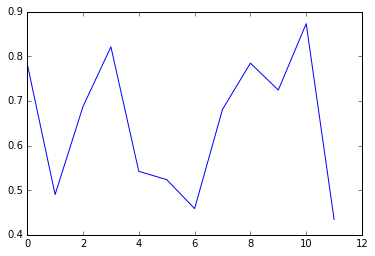

In [35]:
plt.plot(SERacc)
plt.show

In [37]:
plt.plot(SERacc-CVacc)
plt.show

ValueError: operands could not be broadcast together with shapes (12,) (11,) 